<a href="https://colab.research.google.com/github/kipdallaris/Python451Dallaris/blob/main/FinalExam_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import all the necessary packages.  **[2 points]**

In [6]:
import pandas as pd
import io

In [7]:
from google.colab import files
import io
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (4).csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card (4).csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Rename the dependent variable:

In [ ]:
#renaming the dependent variable
df['IsDefaulter'] =df['default.payment.next.month']
df = df.drop('default.payment.next.month',axis = 1)

#renaming a few other independent variables
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
df.head()

# **EXPLORATORY DATA ANALYSIS**  **[05 points]**

2. What is the size of the dataset? What do the columns tell you? That is, what are the features?

3. Print the summary statistics. On Brightspace, describe your findings (in around 4-5 lines). What trends do you notice? Any anomaly? Does anything stick out as being strange?

In [9]:
df_shape = df.shape

df_columns = df.columns

df_shape, df_columns

((30000, 25),
 Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default.payment.next.month'],
       dtype='object'))

In [10]:
summary_statistics = df.describe()

print(summary_statistics)

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

## 4. How would you deal with **missing values**? HINT: look at the education variable and what each category means in the definitions list that I have provided you with.

##### Explain what you do with missing values. Do you drop them, or ignore them, or impute them with the average, or put them into fewer buckets? Explain your reasoning. **Check** if **other variables** require the same treatment or not.  **[5 points]**

In [11]:
mode_education = df['EDUCATION'].mode()[0]
df['EDUCATION'].fillna(mode_education, inplace=True)

df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].fillna(0)

df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].fillna(df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].median())

df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].fillna(0)

missing_values = df.isnull().sum()

print(missing_values)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


<ipython-input-11-47b394a11b90>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].fillna(mode_education, inplace=True)


### Similarly, check for **outliers** and deal with them accordingly.

### 5. What is the **probability of default**?  **[3 points]**

In [12]:
probability_of_default = df['default.payment.next.month'].mean()

print(probability_of_default)

0.2212


### 6. Create a few charts like count of default, and sex, education, marriage, and age versus default. These can be bar charts, pie charts, whatever you like. You can select other variables as per your liking too.  **[10 points]**

Proportion of Default vs Non-Default

Text(0, 0.5, '')

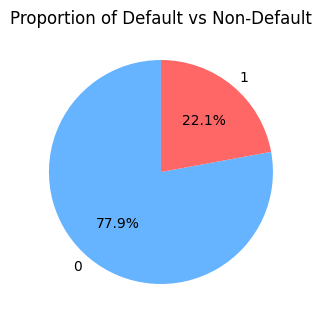

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['default.payment.next.month'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Proportion of Default vs Non-Default')
plt.ylabel('')

Count of Default by Education

Text(0.5, 1.0, 'Count of Default by Education')

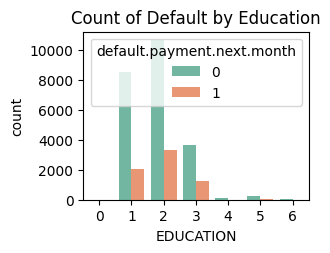

In [14]:
plt.subplot(2, 2, 3)
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df, palette='Set2')
plt.title('Count of Default by Education')

## I am first goint to balance the imbalanced dataset. Next, I have created a column which is the sum of all payments made by each consumer.

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

columns = list(df.columns)
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['IsDefaulter'] = y_smote
df_fr = balance_df.copy()
df_fr['Payment_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

KeyError: 'IsDefaulter'

### 7. What is the payment value and dues value of a defaulter versus a non-defaulter, on average? Show me a boxplot and indicate if there is a difference.  **[4 points]**

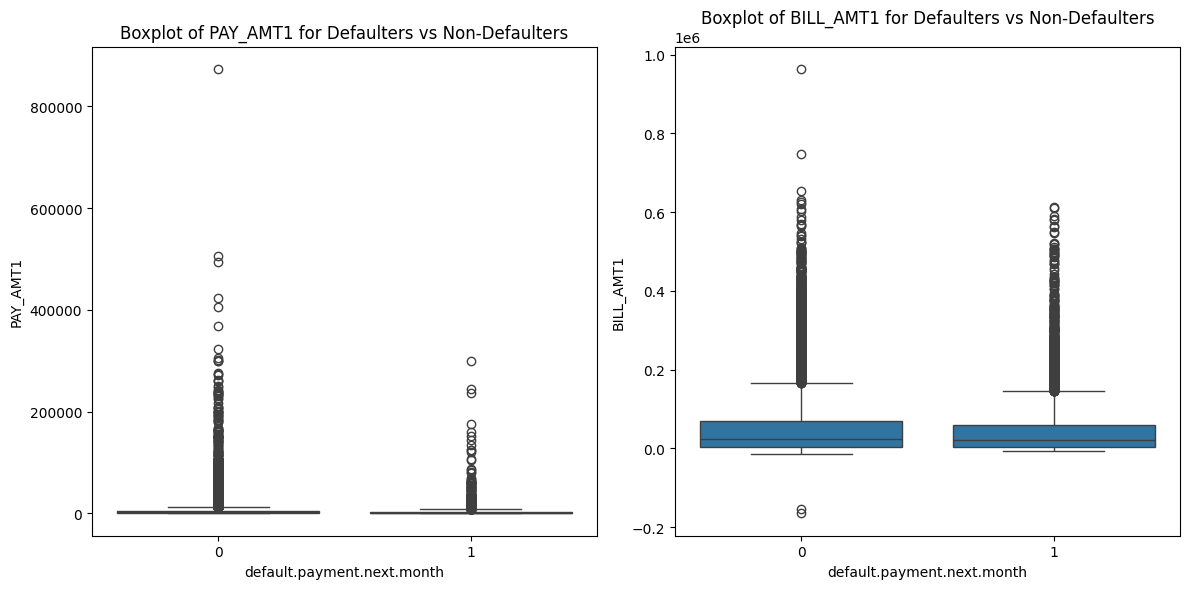

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='default.payment.next.month', y='PAY_AMT1', data=df)
plt.title('Boxplot of PAY_AMT1 for Defaulters vs Non-Defaulters')

plt.subplot(1, 2, 2)
sns.boxplot(x='default.payment.next.month', y='BILL_AMT1', data=df)
plt.title('Boxplot of BILL_AMT1 for Defaulters vs Non-Defaulters')

plt.tight_layout()

plt.show()

### 8. Convert your sex, education, and marriage columns to string variables, and then **'one-hot-encode'** them.  **[6 points]**

#### The process for 'sex' shown to you as an example:

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)
df_fr.head(). # ideally, your table should look like this once you run your code up to this point.

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payment_Value,Dues
0,1,20000.0,0,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,3913.0
1,2,120000.0,0,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,10352.0
2,3,90000.0,0,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,76608.0
3,4,50000.0,0,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,174713.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,44620.0


In [16]:
import pandas as pd

df.replace({'SEX': {1: 'MALE', 2: 'FEMALE'},
            'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Other'},
            'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Other'}}, inplace=True)

df_encoded = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

print(df_encoded.head())

   ID  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   1    20000.0   24      2      2     -1     -1     -2     -2     3913.0   
1   2   120000.0   26     -1      2      0      0      0      2     2682.0   
2   3    90000.0   34      0      0      0      0      0      0    29239.0   
3   4    50000.0   37      0      0      0      0      0      0    46990.0   
4   5    50000.0   57     -1      0     -1      0      0      0     8617.0   

   ...  EDUCATION_5  EDUCATION_6  EDUCATION_Graduate School  \
0  ...        False        False                      False   
1  ...        False        False                      False   
2  ...        False        False                      False   
3  ...        False        False                      False   
4  ...        False        False                      False   

   EDUCATION_High School  EDUCATION_Other  EDUCATION_University  MARRIAGE_0  \
0                  False            False                  True       Fal

### 9. Now, ML.  **[5 points]**

First, Standardize your data, shuffle it, and divide it into the train-test-split samples. Choose a split of your choice.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns=['default.payment.next.month'])
y = df_encoded['default.payment.next.month']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 34) (6000, 34) (24000,) (6000,)


### 9a. Logistic Regression. **[10 points]**
  - run logistic regression.
  - calculate accuracy.
  - print the confusion matrix.
  - plot feature importance.
  - get the classification report.
  - plot the ROC-AUC curve.

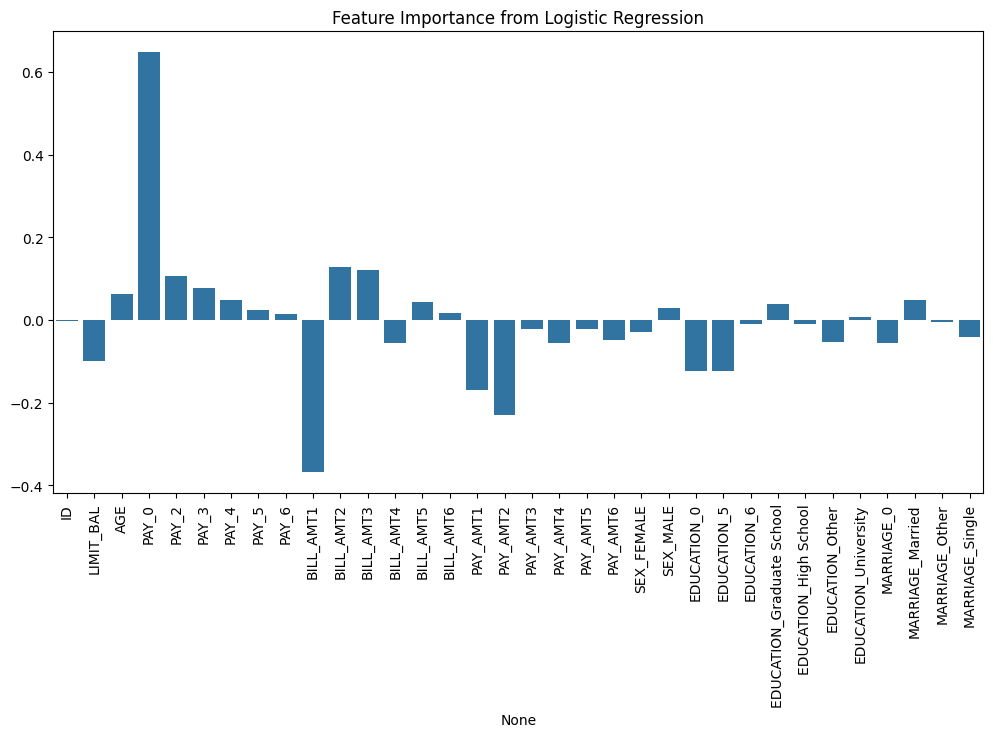

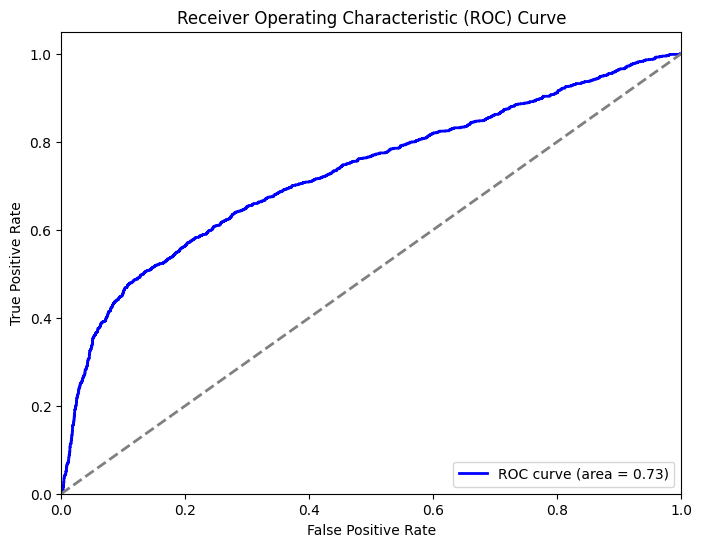

Accuracy: 0.811
Confusion Matrix:
 [[4551  136]
 [ 998  315]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

ROC-AUC: 0.7283164481946873


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

feature_importance = log_reg.coef_[0]

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.xticks(rotation=90)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC-AUC:", roc_auc)

## Repeat the above steps with all the supervised ML techniques that you are familiar with:

#### 9b. Decision Tree                        **[10 points]**
#### 9c. Random Forest                        **[10 points]**
#### 9d. K-Nearest Neighbors                  **[10 points]**
#### 9e. Support Vector Machine (NEW method)  **[10 points]**

Decision Tree

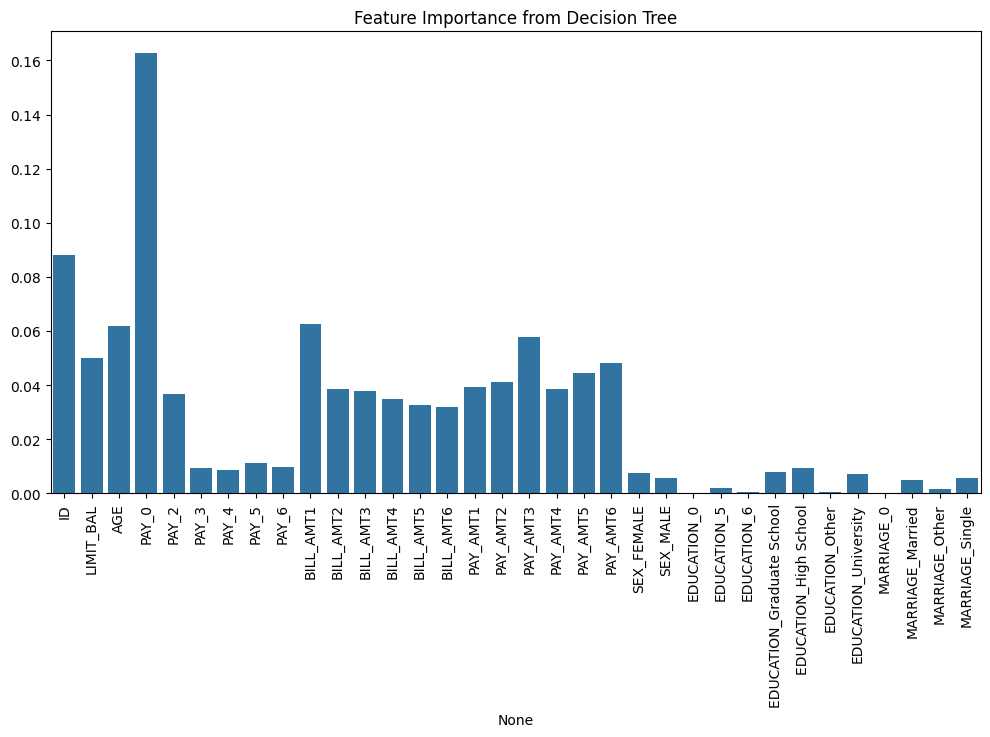

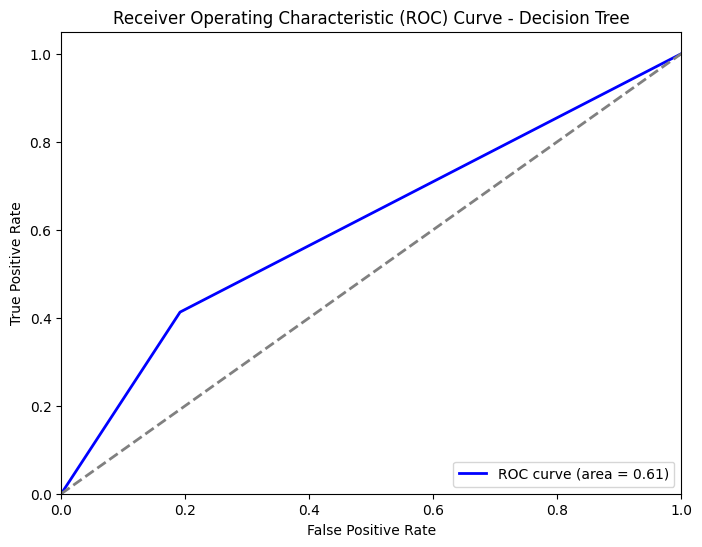

Decision Tree Accuracy: 0.7218333333333333
Decision Tree Confusion Matrix:
 [[3789  898]
 [ 771  542]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000

Decision Tree ROC-AUC: 0.6106006778321397


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

class_report_dt = classification_report(y_test, y_pred_dt)

feature_importance_dt = dt_model.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importance_dt)
plt.title('Feature Importance from Decision Tree')
plt.xticks(rotation=90)
plt.show()

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classification Report:\n", class_report_dt)
print("Decision Tree ROC-AUC:", roc_auc_dt)

Random Forest

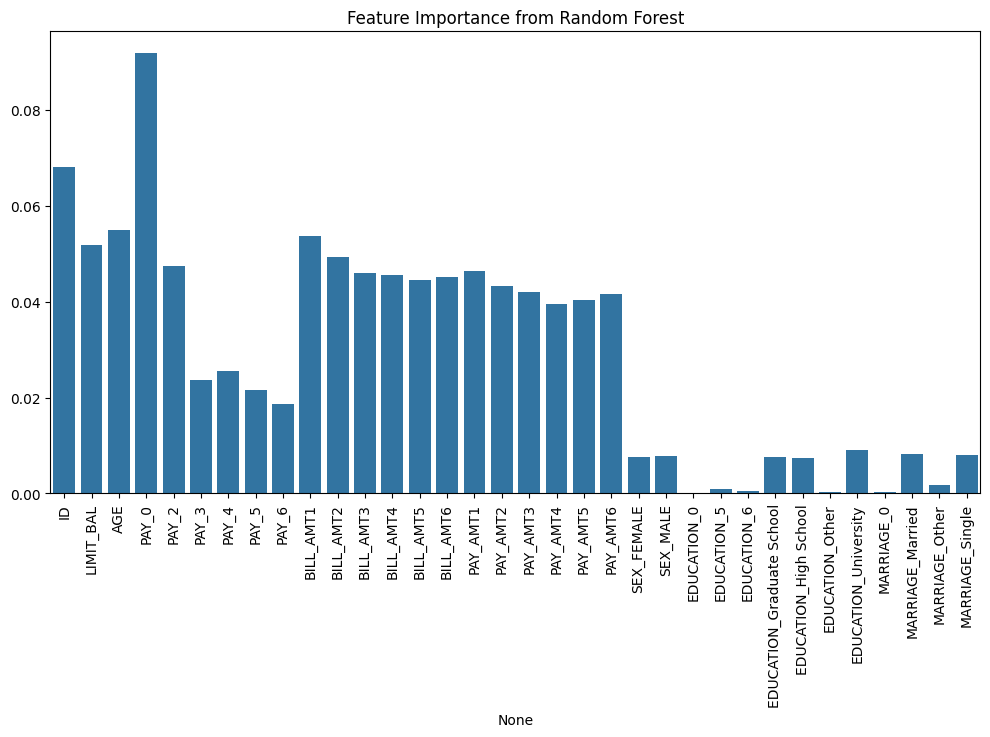

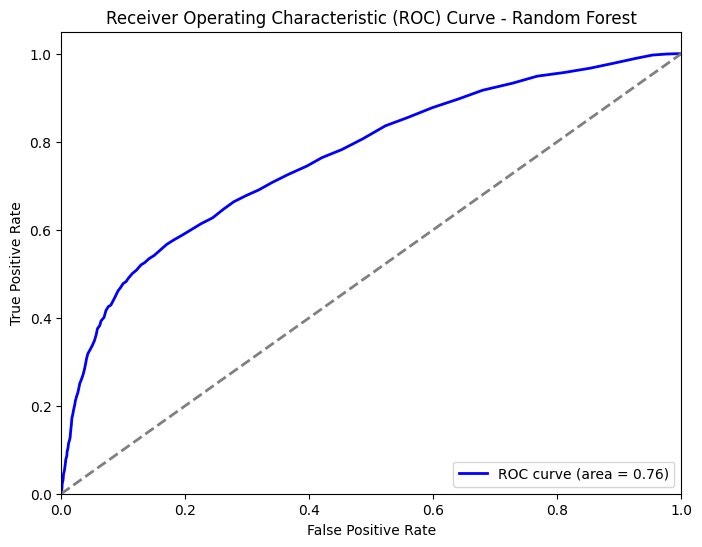

Random Forest Accuracy: 0.8161666666666667
Random Forest Confusion Matrix:
 [[4424  263]
 [ 840  473]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Random Forest ROC-AUC: 0.7635364527737998


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

class_report_rf = classification_report(y_test, y_pred_rf)

feature_importance_rf = rf_model.feature_importances_

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importance_rf)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

KNN

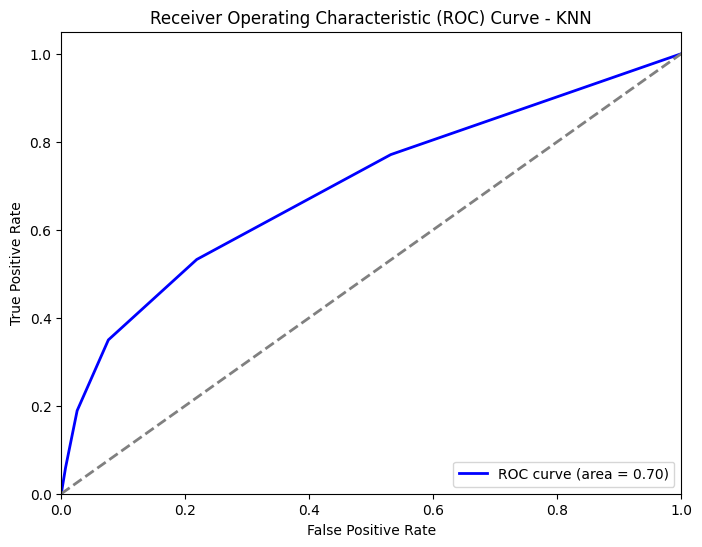

KNN Accuracy: 0.7983333333333333
KNN Confusion Matrix:
 [[4331  356]
 [ 854  459]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4687
           1       0.56      0.35      0.43      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.64      0.65      6000
weighted avg       0.78      0.80      0.78      6000

KNN ROC-AUC: 0.6976887994226872


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

class_report_knn = classification_report(y_test, y_pred_knn)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", class_report_knn)
print("KNN ROC-AUC:", roc_auc_knn)

Support Vector Machine